In [1]:
import os
os.chdir('../')
from python_code import kernel_smoother
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
from scipy.stats import multivariate_normal

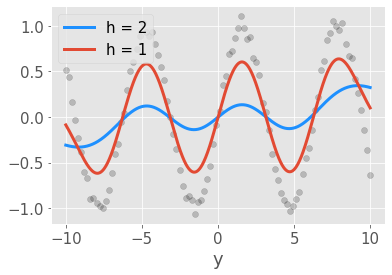

In [20]:
x = np.linspace(-10,10,100).reshape(-1,1)
y = np.sin(x) + np.random.normal(0,.05, size=len(x)).reshape(-1,1)
plt.scatter(x, y, alpha=.2, color='black')
x_smooth = np.linspace(-10,10,1000).reshape(-1,1)
plt.plot(x_smooth, kernel_smoother.KernelSmoother(bandwidth=2).predict(x, y, x_smooth), color='dodgerblue', lw=3, label = 'h = 2')
plt.plot(x_smooth, kernel_smoother.KernelSmoother(bandwidth=1).predict(x, y, x_smooth), lw=3, label = 'h = 1')
plt.legend()
plt.xlabel('x')
plt.xlabel('y');

In [21]:
x = np.linspace(-3,3,100)
xx, yy = np.meshgrid(x, x)
cov = np.eye(2)
mean = np.zeros(2)
vals = multivariate_normal(mean=mean, cov=cov).pdf(np.stack((xx.flatten(), yy.flatten())).T) + np.random.normal(0,.1,size=100*100)



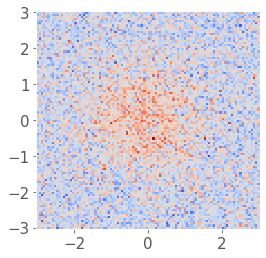

In [22]:
plt.figure(figsize=(4, 4))
plt.pcolormesh(xx, yy, vals.reshape(100,100), cmap='coolwarm',shading='auto');

In [23]:
points = np.stack((xx.flatten(),yy.flatten())).T

In [24]:
val_pred = kernel_smoother.KernelSmoother(bandwidth=1).predict(points, vals, points)

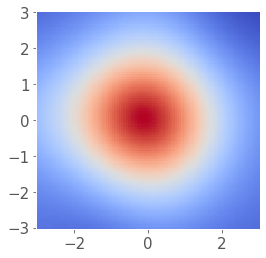

In [25]:
plt.figure(figsize=(4, 4))
plt.pcolormesh(xx, yy, val_pred.reshape(100,100), cmap='coolwarm',shading='auto');

In [27]:
x_train = np.linspace(-10,10,100).reshape(-1,1)
y_train = x_train**2 + np.random.normal(0,5, size=len(x_train)).reshape(-1,1)
x_test = np.linspace(-10,10,100).reshape(-1,1)
y_test = x_test**2 + np.random.normal(0,5, size=len(x_test)).reshape(-1,1)
smoother = kernel_smoother.KernelSmoother(bandwidth=2)
smoother.fit(x_train, x_test, y_train, y_test)
smoother.bandwidth

0.3971943887775551

In [34]:
x_plot = np.linspace(-10, 10, 1000).reshape(-1,1)

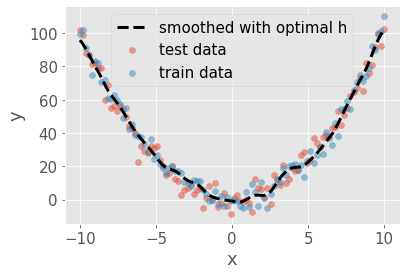

In [40]:
plt.plot(x_plot, smoother.predict(x_train, y_train, x_plot), color='black', lw=3, linestyle='--', label='smoothed with optimal h')
plt.scatter(x_test, y_test, alpha =.5, label='test data')
plt.scatter(x_train, y_train, alpha =.5, label='train data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');